In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy.visualization import ZScaleInterval
from mpl_toolkits.axes_grid1 import make_axes_locatable

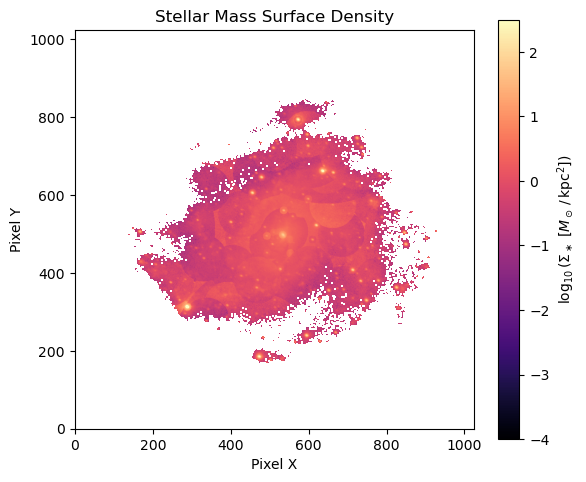

In [2]:
# But I made it into my own stellar mass surface density map --> He made a different one with a different scale
maps = fits.open("fitres_pixbin_fluxmap.fits")

gal_region = maps['galaxy_region'].data
rows, cols = np.where(gal_region != 1)

mass_map = maps['pix-log_mass-p50'].data

# Pixel scale in kpc/pixel -- from ARCSAT website
kpc_per_arcsec = 5.9e3 / 206265  
kpc_per_pix = 0.656 * kpc_per_arcsec
pixel_area_kpc2 = kpc_per_pix**2

map_prop_SM = mass_map - np.log10(pixel_area_kpc2)
map_prop_SM[rows, cols] = np.nan

plt.figure(figsize=(6,5))
plt.imshow(map_prop_SM, origin='lower', cmap='magma', vmin=-4, vmax=2.5)
plt.colorbar(label=r'$\log_{10}(\Sigma_\ast\ [M_\odot\,/\,\mathrm{kpc}^2])$')
plt.title('Stellar Mass Surface Density')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.tight_layout()
plt.savefig("stellar_mass_surface_density_corrected.png", dpi=300)
plt.show()

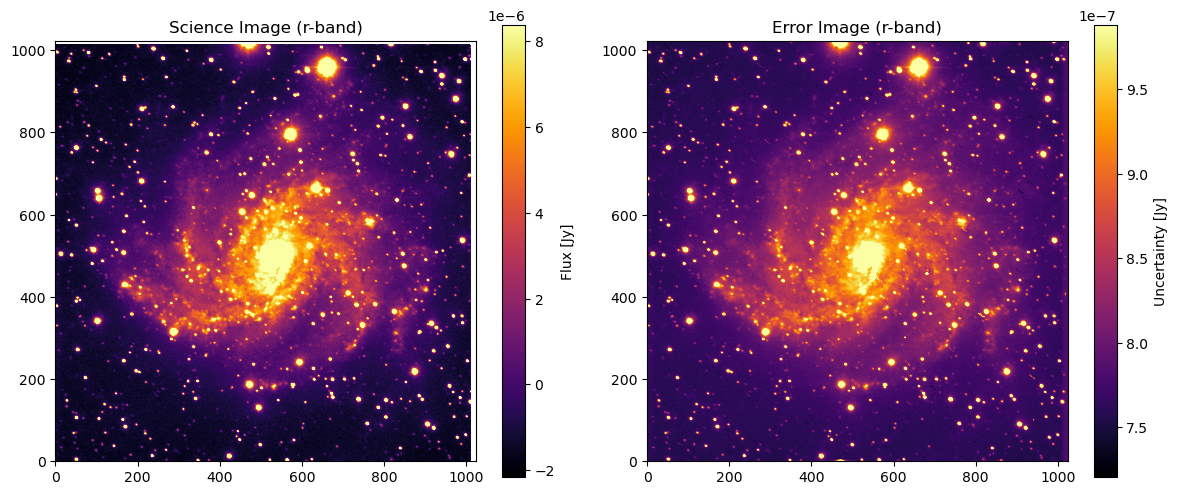

In [3]:
sci_data = fits.getdata("sdss_r_sci.fits")
err_data = fits.getdata("sdss_r_err.fits")

interval = ZScaleInterval()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
vmin, vmax = interval.get_limits(sci_data)
plt.imshow(sci_data, cmap='inferno', origin='lower', vmin=vmin, vmax=vmax)
plt.title("Science Image (r-band)")
plt.colorbar(label='Flux [Jy]')

plt.subplot(1, 2, 2)
vmin, vmax = interval.get_limits(err_data)
plt.imshow(err_data, cmap='inferno', origin='lower', vmin=vmin, vmax=vmax)
plt.title("Error Image (r-band)")
plt.colorbar(label='Uncertainty [Jy]')
plt.tight_layout()
plt.savefig("science_and_error_image.png", dpi=300)
plt.show()


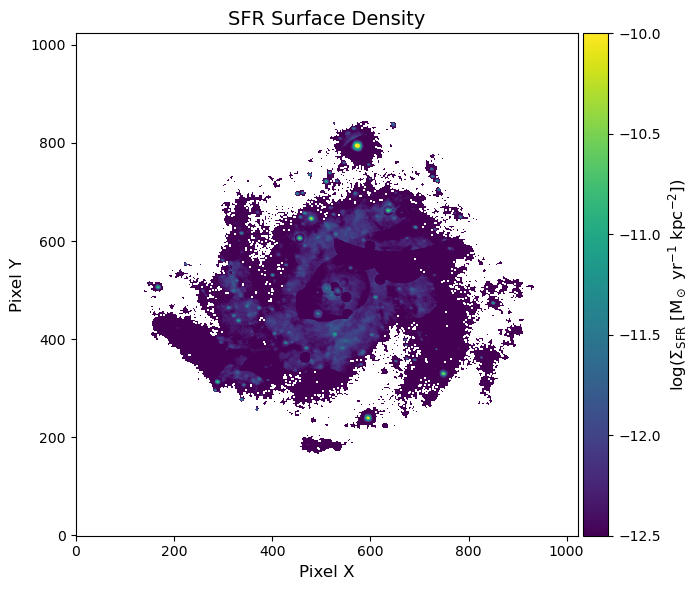

In [4]:
# Some code from Dylan, some of the plot_mapp

maps = fits.open("fitres_pixbin_fluxmap.fits")

gal_region = maps['GALAXY_REGION'].data
rows, cols = np.where(gal_region != 1)

map_SFR = maps['PIX-LOG_SFR-P50'].data   # From Dylan --> Takes the median (50th percentile) 
map_SFR[rows, cols] = np.nan

def plot_map(data, title, cmap, vmin, vmax, cbarlabel, filename):
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.imshow(data, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax)
    cb.set_label(cbarlabel, fontsize=12)
    cb.ax.tick_params(labelsize=10)

    ax.set_xlabel('Pixel X', fontsize=12)
    ax.set_ylabel('Pixel Y', fontsize=12)
    ax.tick_params(labelsize=10)
    ax.set_title(title, fontsize=14)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_map(
    map_SFR,
    "SFR Surface Density",
    cmap="viridis",
    vmin=-12.5,
    vmax=-10,
    cbarlabel=r"log($\Sigma_{\rm SFR}$ [M$_\odot$ yr$^{-1}$ kpc$^{-2}$])",
    filename="sfr_surface_density_zoomed.png"
)
